<a href="https://colab.research.google.com/github/ABenatti/Gray-Scott-Simulation/blob/master/Gray_Scott_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gray-Scott Reaction Simulation

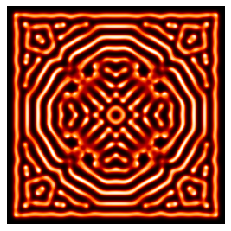

In [44]:
#Gray-Scott Simulation

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d


def du_dt(f):
    df = Du*convolve2d(f, maske, mode="same") - v*v*u + F*(1.0 - u)
    return df

def dv_dt(f):
    df = Dv*convolve2d(f, maske, mode="same") + v*v*u - (F+k)*v
    return df

maske = np.array([[0, 1, 0], 
                  [1, -4, 1], 
                  [0, 1, 0]])


#parameters setting
F = 0.02                #feed rate
k = 0.052               #kill rate

Du, Dv = 0.16, 0.08     #diffusion coefficients
L = 252                 #fig dimention

u = np.zeros((L, L))
u2 = np.zeros((L, L))
v = np.zeros((L, L))
v2 = np.zeros((L, L))

#initial condition
u[L//2-6:L//2+6, L//2-6:L//2+6] = 1.0
v[L//2-3:L//2+3, L//2-3:L//2+3] = 1.0

iterations = 10000      #number of iterarion 
dt = 1.0                #step
for i in range(iterations):
    if i % 2 == 0:
        u2[:] = u + du_dt(u)* dt
        v2[:] = v + dv_dt(v)* dt
    else:
        u[:] = u2 + du_dt(u2)* dt
        v[:] = v2 + dv_dt(v2)* dt


#show the image
fig, ax = plt.subplots()
ax.imshow(v, cmap= 'gist_heat')
ax.set_axis_off()